In [3]:
import pandas as pd
import numpy as np

In [5]:
#dallas = pd.read_csv("/Users/joshnoble/projects/w210/evictions/NTEP_eviction_cases.csv", low_memory=False)
dallas = pd.read_csv("/Users/joshnoble/projects/w210/evictions/cleaned_dallas_records.csv")

In [6]:
dallas.head()

,Unnamed: 0,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,48113003400,75215.0,4819000.0,48113,-96.780003,32.762274
1,1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,48113003700,75215.0,4819000.0,48113,-96.757373,32.767008
2,3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.743307,32.775385
3,4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.742441,32.776028
4,5,1804377H,2018-07-10,656.0,48113-1-1,4819000-14,48113003101,75201.0,4819000.0,48113,-96.798797,32.781548


In [7]:
dallas = dallas[(dallas['amount'] > 0) & (dallas['date'].notna()) & (dallas['tract_id'].notna())]

dallas['tract_id'] = dallas['tract_id'].astype(np.int64)

In [8]:
dallas.head()

,Unnamed: 0,case_number,date,amount,precinct_id,council_id,tract_id,zip_id,city_id,county_id,lon,lat
0,0,1804351H,2018-07-10,1590.0,48113-1-1,4819000-07,48113003400,75215.0,4819000.0,48113,-96.780003,32.762274
1,1,1804378H,2018-07-10,1217.0,48113-1-1,4819000-07,48113003700,75215.0,4819000.0,48113,-96.757373,32.767008
2,3,1804376H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.743307,32.775385
3,4,1804375H,2018-07-10,700.0,48113-1-1,4819000-07,48113002701,75210.0,4819000.0,48113,-96.742441,32.776028
4,5,1804377H,2018-07-10,656.0,48113-1-1,4819000-14,48113003101,75201.0,4819000.0,48113,-96.798797,32.781548


In [172]:
dallas.to_csv("cleaned_dallas_records.csv")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9849a8b7f0>]],
      dtype=object)

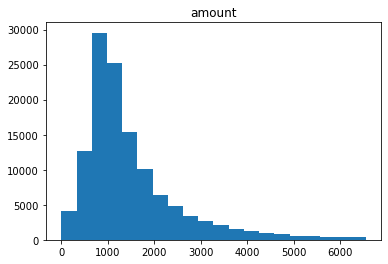

In [9]:
dallas.hist(column='amount', bins=20, grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f98605facd0>]],
      dtype=object)

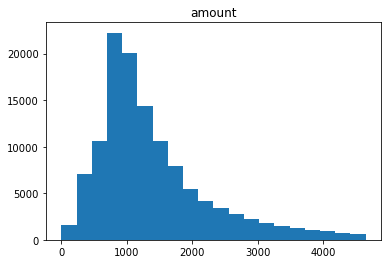

In [10]:
from scipy import stats

dallas = dallas[(np.abs(stats.zscore(dallas['amount'])) < 3)]
dallas.hist(column='amount', bins=20, grid=False)

In [11]:
grouped_df = dallas.groupby(["tract_id"])
most_common_tracts = grouped_df['tract_id'].count().sort_values(ascending=False)

In [12]:
most_common_tracts[:40]

tract_id
48113016607    2267
48113019035    1799
48113010902    1636
48113012604    1611
48113007811    1450
48113010904    1441
48113018503    1425
48113018506    1233
48113007202    1015
48113012210    1008
48113013011     878
48113016804     875
48113008604     873
48113012000     866
48113013010     859
48113013806     835
48113013615     818
48113020400     815
48113017813     814
48113019040     809
48113007818     793
48113017805     791
48113008701     783
48113009304     780
48113008704     771
48113012302     753
48113011001     750
48113013621     750
48113016605     750
48113007201     749
48113018505     724
48113012100     714
48113006100     713
48113014403     699
48113002000     696
48113017004     692
48113006800     687
48113018138     673
48113011401     670
48113014116     668
Name: tract_id, dtype: int64

In [13]:
means = []

for key in most_common_tracts[:40].keys():
    t = dallas[dallas['tract_id'] == key]
    means.append({'tract' : key, 'mean' : t['amount'].mean(), 'max' : t['amount'].max(), 'min' : t['amount'].min()})

48113016607
48113019035
48113010902
48113012604
48113007811
48113010904
48113018503
48113018506
48113007202
48113012210
48113013011
48113016804
48113008604
48113012000
48113013010
48113013806
48113013615
48113020400
48113017813
48113019040
48113007818
48113017805
48113008701
48113009304
48113008704
48113012302
48113011001
48113013621
48113016605
48113007201
48113018505
48113012100
48113006100
48113014403
48113002000
48113017004
48113006800
48113018138
48113011401
48113014116


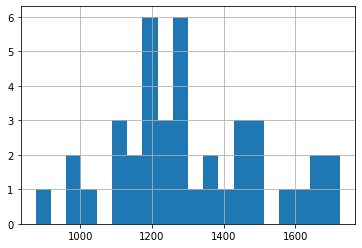

In [14]:
means_df = pd.DataFrame(means)
means_df['mean'].hist(bins=20)

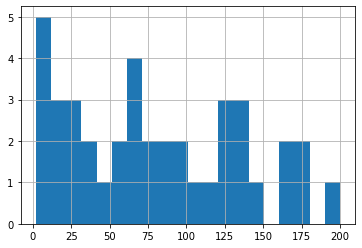

In [15]:
means_df['min'].hist(bins=20)

In [16]:
date_grouped_df = dallas.groupby(["date"])

In [17]:
dallas['week_dt'] = pd.to_datetime(dallas['date']) - pd.to_timedelta(7, unit='d')
dallas['date_dt'] = pd.to_datetime(dallas['date'])
dallas_week_ts = dallas.groupby([pd.Grouper(key='week_dt', freq='W-MON')]).count().reset_index().sort_values('week_dt')
dallas_ts = dallas.groupby([pd.Grouper(key='date_dt')]).count().reset_index().sort_values('date_dt')

In [18]:
bcheck = pd.to_datetime('2017-01-09')
echeck = pd.to_datetime('2017-01-17')

len(dallas[(dallas['date_dt'] > bcheck) & (dallas['date_dt'] < echeck)])

822

In [19]:
dallas_ts['date_delta'] = (dallas_ts['date_dt'] - dallas_ts['date_dt'].min())  / np.timedelta64(1,'D')
dallas_ts = dallas_ts[['date_delta', 'case_number']]
dallas_ts.head()

,date_delta,case_number
0,0.0,49
1,1.0,43
2,2.0,43
3,3.0,22
4,4.0,1


In [20]:
dallas_week_ts['date_delta'] = (dallas_week_ts['week_dt'] - dallas_week_ts['week_dt'].min())  / np.timedelta64(1,'W')
dallas_week_ts = dallas_week_ts[['date_delta', 'case_number']]
dallas_week_ts.head()

,date_delta,case_number
0,0.0,266
1,1.0,822
2,2.0,1274
3,3.0,444
4,4.0,218


In [21]:
import xgboost

In [22]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions


/Users/joshnoble/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=92.0, predicted=120.9
>expected=89.0, predicted=68.4
>expected=136.0, predicted=88.7
>expected=116.0, predicted=132.0
>expected=104.0, predicted=73.8
>expected=111.0, predicted=91.3
>expected=125.0, predicted=91.1
>expected=84.0, predicted=82.4
>expected=109.0, predicted=94.8
>expected=94.0, predicted=108.2
>expected=67.0, predicted=91.8
>expected=90.0, predicted=80.2
MAE: 21.759


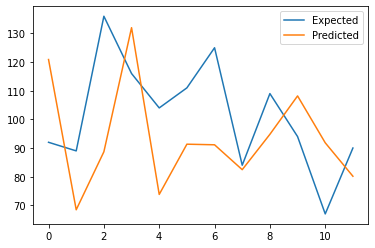

In [23]:
# load the dataset
series = dallas_ts
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

/Users/joshnoble/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


>expected=344.0, predicted=262.7
>expected=522.0, predicted=316.5
>expected=316.0, predicted=282.5
>expected=200.0, predicted=214.8
>expected=285.0, predicted=220.6
>expected=518.0, predicted=342.5
>expected=370.0, predicted=243.3
>expected=310.0, predicted=266.4
>expected=164.0, predicted=251.7
>expected=489.0, predicted=348.4
>expected=540.0, predicted=426.3
>expected=360.0, predicted=399.3
MAE: 93.877


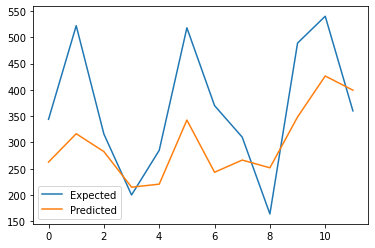

In [24]:
# load the dataset
series = dallas_week_ts
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [25]:
import pandas as pd
from prophet import Prophet

In [29]:
# Python
m = Prophet()

prophet_ts = dallas_ts
prophet_ts = prophet_ts.rename(columns={"date_delta": "ds", "case_number": "y"})

m.fit(prophet_ts)

INFO:numexpr.utils:Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods=20)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)

MemoryError: Unable to allocate 182. TiB for an array with shape (25043465573412,) and data type float64